In [1]:
import pandas as pd

[Youtube video](https://www.youtube.com/watch?v=zM4VZR0px8E&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=8&ab_channel=codebasics )

In [31]:
df = pd.read_csv('/content/sample_data/insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [23]:
len(df)

27

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

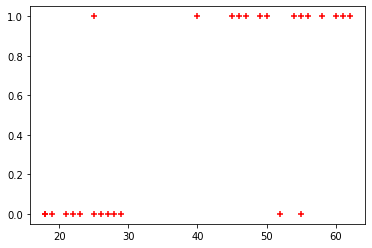

In [12]:
plt.scatter(df[['age']], df.bought_insurance, marker='+', color="red")

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance, test_size=0.1)

In [58]:
len(X_train)

24

In [59]:
len(X_test)

3

In [60]:
X_test

,age
9,61
5,56
12,27


In [61]:
logisticReg = LogisticRegression()

In [62]:
logisticReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
logisticReg.predict(X_test)

array([1, 1, 0])

In [64]:
logisticReg.score(X_test,y_test)

1.0

In [66]:
logisticReg.predict_log_proba(X_test)

array([[-2.86806854, -0.05848599],
       [-2.28580705, -0.10724224],
       [-0.20484375, -1.68618188]])

predict_log_proba(X_test) will predict the probability of data being in one class. Here it means 0 or 1.

In [67]:
df2 = pd.read_csv('/content/sample_data/HR_comma_sep.csv')

In [69]:
df2.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [73]:
emp_left = df2[df2.left==1]
emp_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [74]:
emp_retained = df2[df2.left == 0]
emp_retained

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [75]:
df2.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


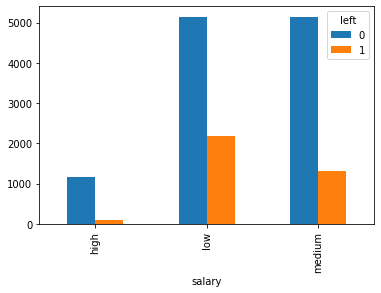

In [77]:
pd.crosstab(df2.salary, df2.left).plot(kind="bar")

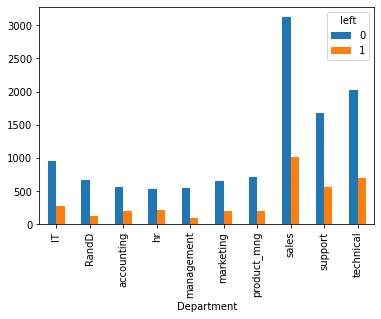

In [79]:
pd.crosstab(df2.Department, df2.left).plot(kind="bar")

From the data analysis so far we can conclude that we will use following variables as independant variables in our model
1. Satisfaction Level
2. Average Monthly Hours
3. Promotion Last 5 Years
4. Salary

In [81]:
subset_df = df2[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subset_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [84]:
temp_salary = pd.get_dummies(subset_df.salary,prefix="salary")
temp_salary.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [90]:
new_df = pd.concat([subset_df,temp_salary],axis="columns")
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


"inplace=True" will drop the column from the dataframe directly.

In [93]:
new_df.drop('salary',axis="columns",inplace=True)
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [94]:
X = new_df

In [95]:
Y = df2.left

In [96]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [119]:
y_test

10383    0
13718    0
8332     0
5950     0
9468     0
        ..
3953     0
1328     1
1118     1
14477    1
3745     0
Name: left, Length: 1500, dtype: int64

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [123]:
model.score(X_test, y_test)

0.7853333333333333